## Time Series Analysis

CoderCave Objective: Embark on a time series analysis project using a dataset with a time component, specifically historical stock prices. The objective is to uncover patterns, trends, and insights from the temporal data, enabling a better
understanding of stock price movements over time.

### Data Collection

In [35]:
# Importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:/Users/vishnuvardhan/Documents/CODERS CAVE/POWER CONSUMPTION IN INDIA-GOLDEN TASK/archive/dataset_tk.csv')

In [3]:
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [4]:
df.columns = ['Date time'] + list(df.columns[1:])
df.head()

,Date time,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [5]:
df['Total'] = df.drop('Date time', axis = 1).sum(axis =1)

In [6]:
df.head()

,Date time,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Total
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,3373.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3403.7
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,3304.1
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,3308.9
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,3316.9


In [7]:
df1 = df.loc[:,['Date time', 'Total']]
df1['Date time'] = pd.to_datetime(df1['Date time'], format = "%d/%m/%Y %H:%M:%S")
df1.head()

,Date time,Total
0,2019-01-02,3373.4
1,2019-01-03,3403.7
2,2019-01-04,3304.1
3,2019-01-05,3308.9
4,2019-01-06,3316.9


In [8]:
df1.tail()

,Date time,Total
498,2020-12-01,3741.5
499,2020-12-02,3763.8
500,2020-12-03,3726.6
501,2020-12-04,3642.1
502,2020-12-05,3407.0


In [9]:
color_pal = sns.color_palette()

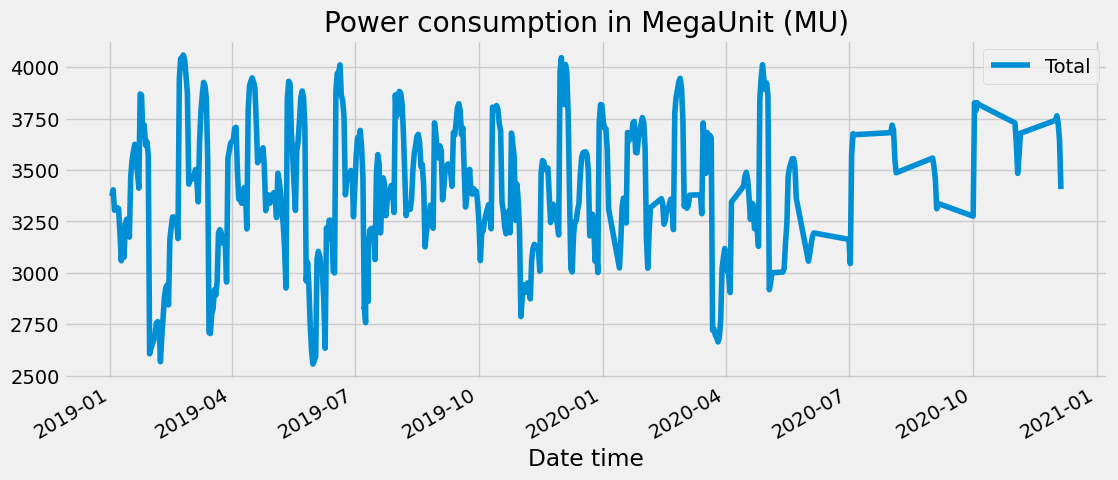

In [10]:
df1.plot(x= 'Date time', y = 'Total', style='-', figsize=(12, 5), color=color_pal[0],
title = 'Power consumption in MegaUnit (MU)')
plt.show()

## train and split

In [11]:
train = df1.loc[(df1['Date time'] < '2019-10-01')]
test = df1.loc[(df1['Date time'] > '2019-10-01') ]

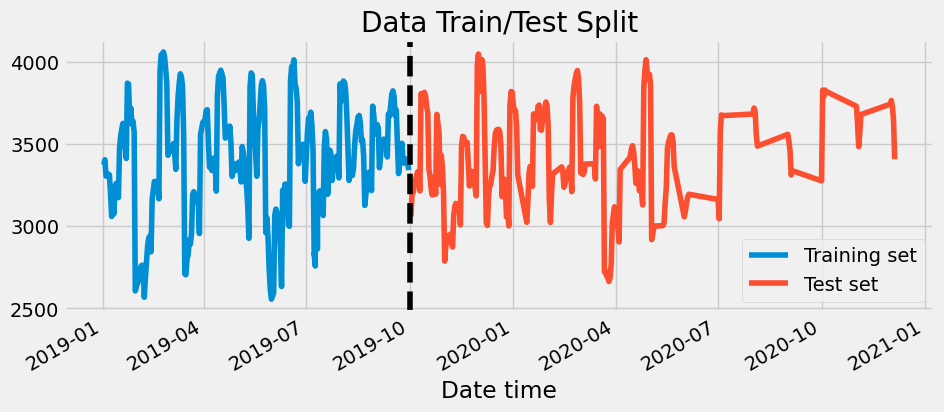

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))
train.plot(x= 'Date time', y = 'Total', ax = ax, label = 'Training set', title='Data Train/Test Split')
test.plot(x= 'Date time', y = 'Total', ax = ax, label = 'Test set' )
ax.axvline('2019-10-01', color = 'Black', linestyle = '--')
ax.legend(['Training set', 'Test set'])
plt.show()

In [13]:
week_of_data = df1.loc[(df1['Date time'] >= '2019-04-27') & (df1['Date time'] <= '2019-05-06')]
week_of_data

,Date time,Total
112,2019-04-27,3338.4
113,2019-04-28,3379.6
114,2019-04-29,3337.8
115,2019-04-30,3362.3
116,2019-05-02,3389.4
117,2019-05-03,3362.2
118,2019-05-04,3268.8
119,2019-05-05,3484.1
120,2019-05-06,3447.0


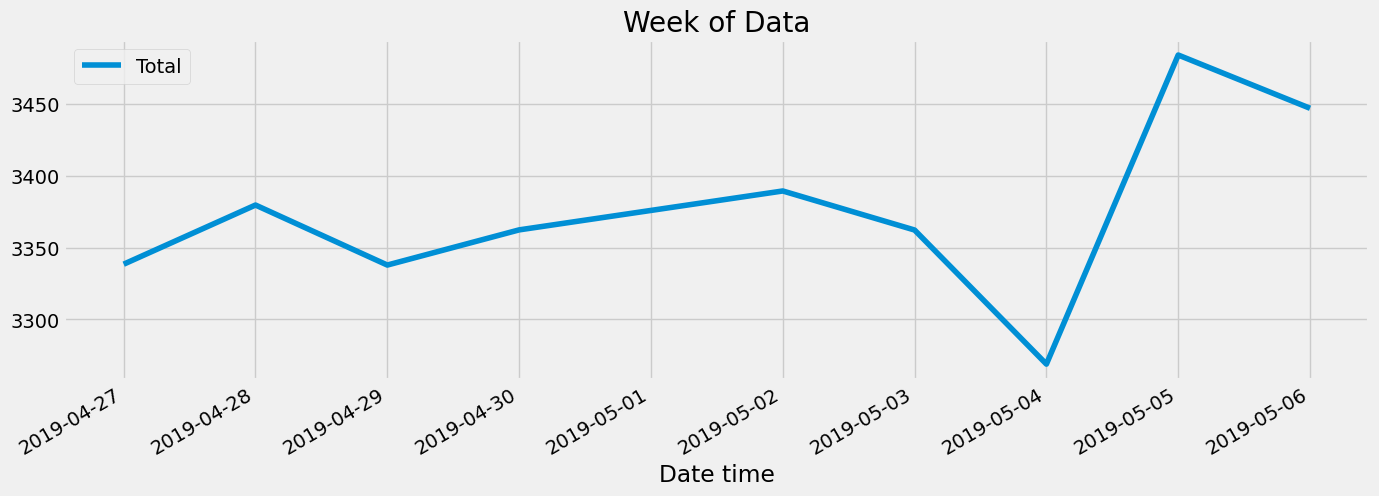

In [14]:
week_of_data.plot(x= 'Date time', y = 'Total', figsize=(15,5), title = 'Week of Data')
plt.show()

Here Day 28 = Sunday, 29 = monday, 30 = tuesday, 01 = wednesday, 02 = thurday, 03 = friday, 04 = saturday, 05 = sunday 

## Feature Creation

In [15]:
def create_features(df1):
    """
    create time series features based on time series index
    """
    df1 = df1.copy()
    df1['dayofweek'] = df1['Date time'].dt.dayofweek
    df1['quarter'] = df1['Date time'].dt.quarter
    df1['month'] = df1['Date time'].dt.month
    df1['year'] = df1['Date time'].dt.year
    df1['dayofyear'] = df1['Date time'].dt.dayofyear
    return df1

df1 = create_features(df1)


In [16]:
df1.head()

,Date time,Total,dayofweek,quarter,month,year,dayofyear
0,2019-01-02,3373.4,2,1,1,2019,2
1,2019-01-03,3403.7,3,1,1,2019,3
2,2019-01-04,3304.1,4,1,1,2019,4
3,2019-01-05,3308.9,5,1,1,2019,5
4,2019-01-06,3316.9,6,1,1,2019,6


In [17]:
df1.tail()

,Date time,Total,dayofweek,quarter,month,year,dayofyear
498,2020-12-01,3741.5,1,4,12,2020,336
499,2020-12-02,3763.8,2,4,12,2020,337
500,2020-12-03,3726.6,3,4,12,2020,338
501,2020-12-04,3642.1,4,4,12,2020,339
502,2020-12-05,3407.0,5,4,12,2020,340


Text(0.5, 1.0, 'MegaUnits(MU) by days')

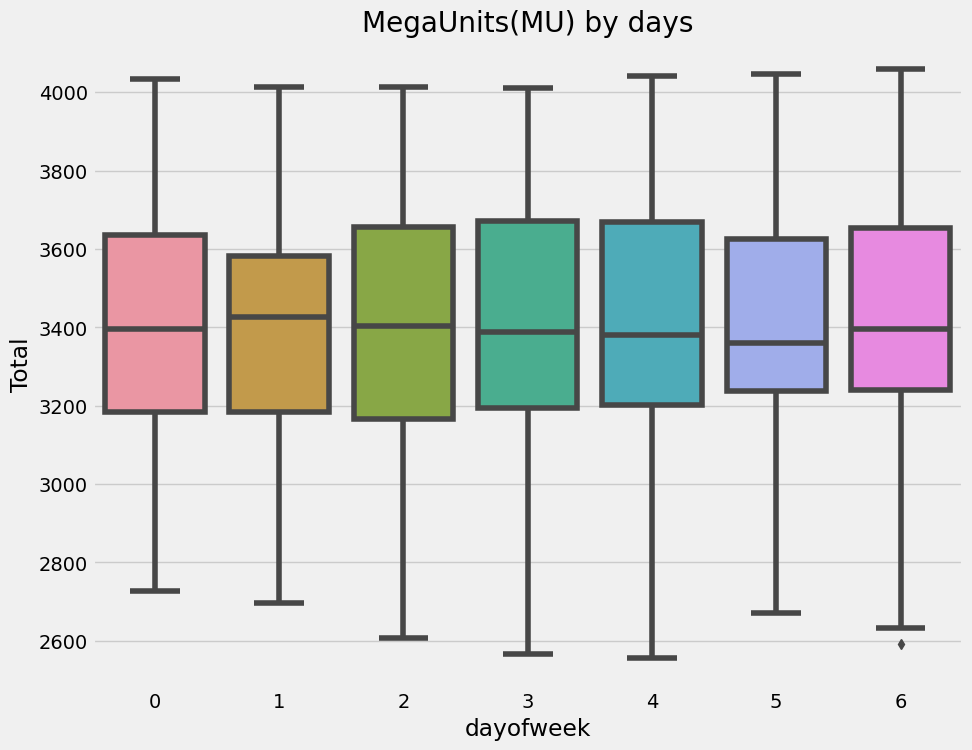

In [18]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df1, x = 'dayofweek', y = 'Total')
ax.set_title('MegaUnits(MU) by days')

Text(0.5, 1.0, 'MegaUnits(MU) by days')

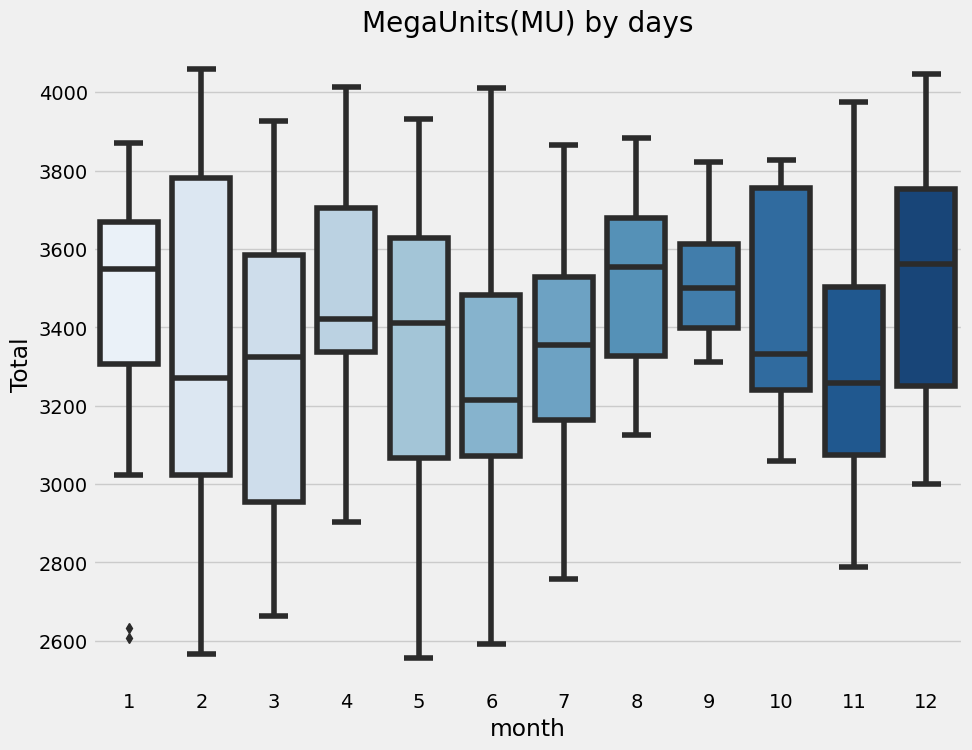

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df1, x = 'month', y = 'Total', palette = 'Blues')
ax.set_title('MegaUnits(MU) by days')

Text(0.5, 1.0, 'MegaUnits(MU) by days')

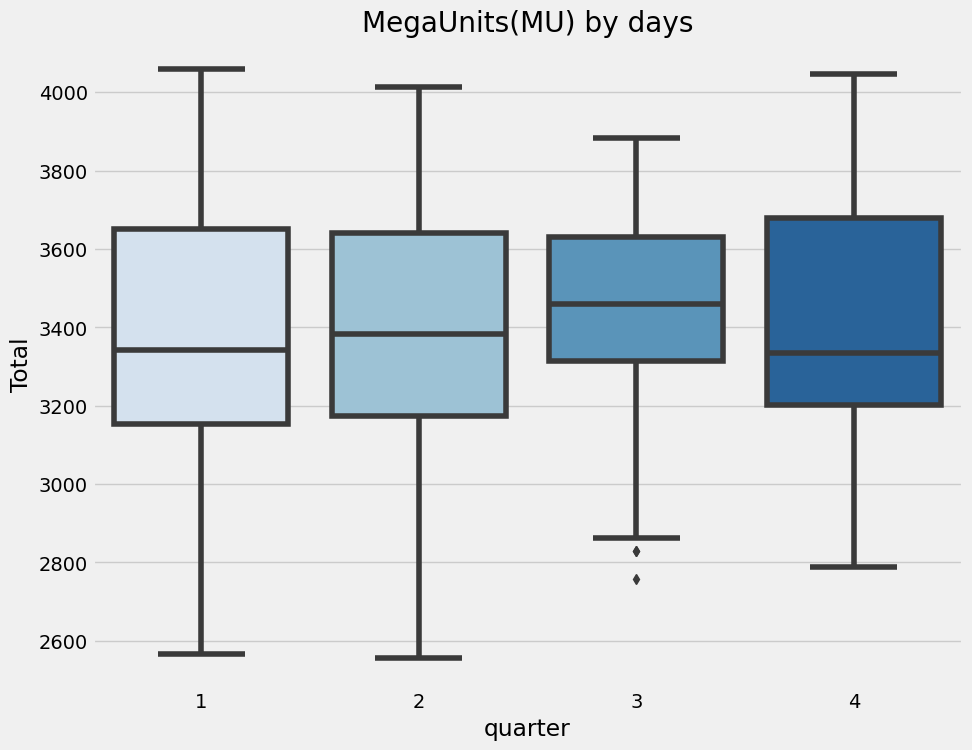

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df1, x = 'quarter', y = 'Total', palette = 'Blues')
ax.set_title('MegaUnits(MU) by days')

Text(0.5, 1.0, 'MegaUnits(MU) by days')

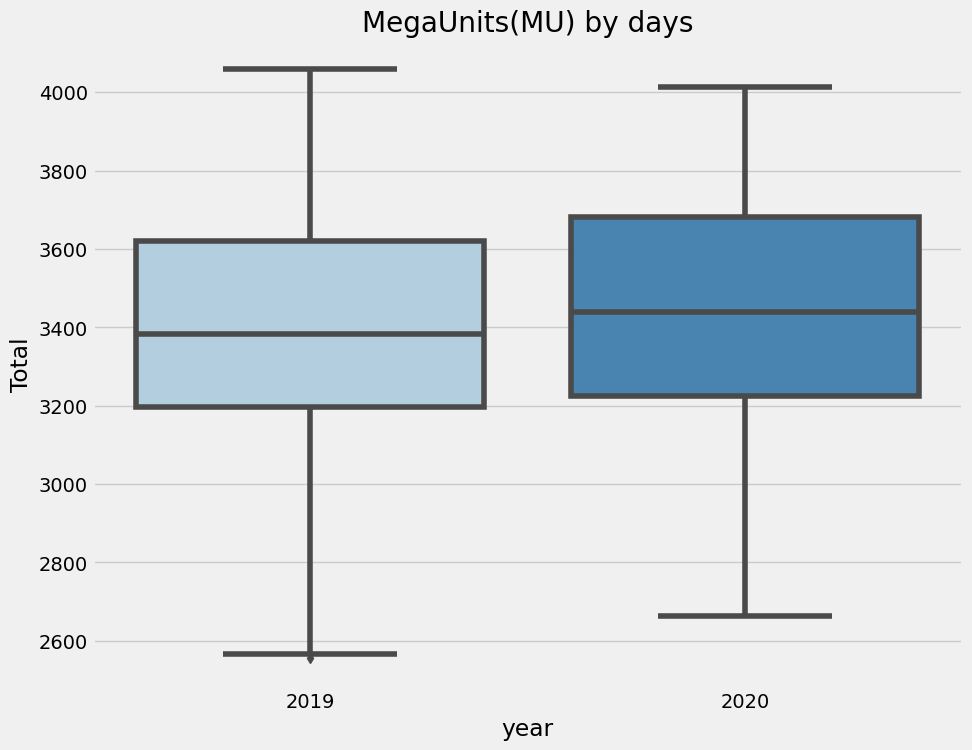

In [21]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df1, x = 'year', y = 'Total', palette = 'Blues')
ax.set_title('MegaUnits(MU) by days')

## Visualizing the feature

## Train the model

In [22]:
df1.head()

,Date time,Total,dayofweek,quarter,month,year,dayofyear
0,2019-01-02,3373.4,2,1,1,2019,2
1,2019-01-03,3403.7,3,1,1,2019,3
2,2019-01-04,3304.1,4,1,1,2019,4
3,2019-01-05,3308.9,5,1,1,2019,5
4,2019-01-06,3316.9,6,1,1,2019,6


In [23]:
df1['dayofyear']

0        2
1        3
2        4
3        5
4        6
      ... 
498    336
499    337
500    338
501    339
502    340
Name: dayofyear, Length: 503, dtype: int32

In [24]:
train = create_features(train)
test = create_features(test)

In [25]:
df1.columns

Index(['Date time', 'Total', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [26]:
FEATURES = ['dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = ['Total']

In [27]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [28]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',n_estimators = 1000, 
                       early_stopping_rounds=50, objective='reg:linear',max_depth=8,learning_rate=0.01)
reg.fit(x_train, y_train,
       eval_set=[(x_train, y_train), (x_test, y_test)],
       verbose=100)

[22:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3376.66894	validation_1-rmse:3385.73687
[100]	validation_0-rmse:1279.34363	validation_1-rmse:1284.47668
[200]	validation_0-rmse:519.17632	validation_1-rmse:545.85379
[300]	validation_0-rmse:230.84475	validation_1-rmse:372.60637
[400]	validation_0-rmse:121.38239	validation_1-rmse:352.54101
[479]	validation_0-rmse:83.24359	validation_1-rmse:353.46293


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

## Feature Important

In [29]:
fi = pd.DataFrame(reg.feature_importances_,
             index=reg.feature_names_in_,
            columns=['importance'])
             

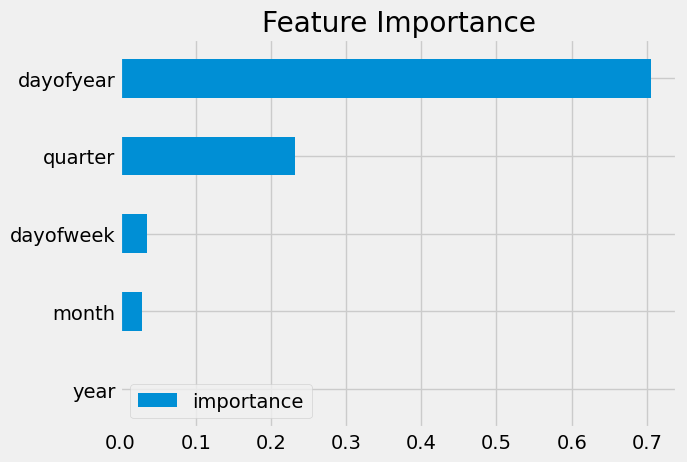

In [30]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

In [31]:
test['prediction'] = reg.predict(x_test)

In [32]:
df1 = df1.merge(test[['prediction']], how='left', left_index=True, right_index=True)

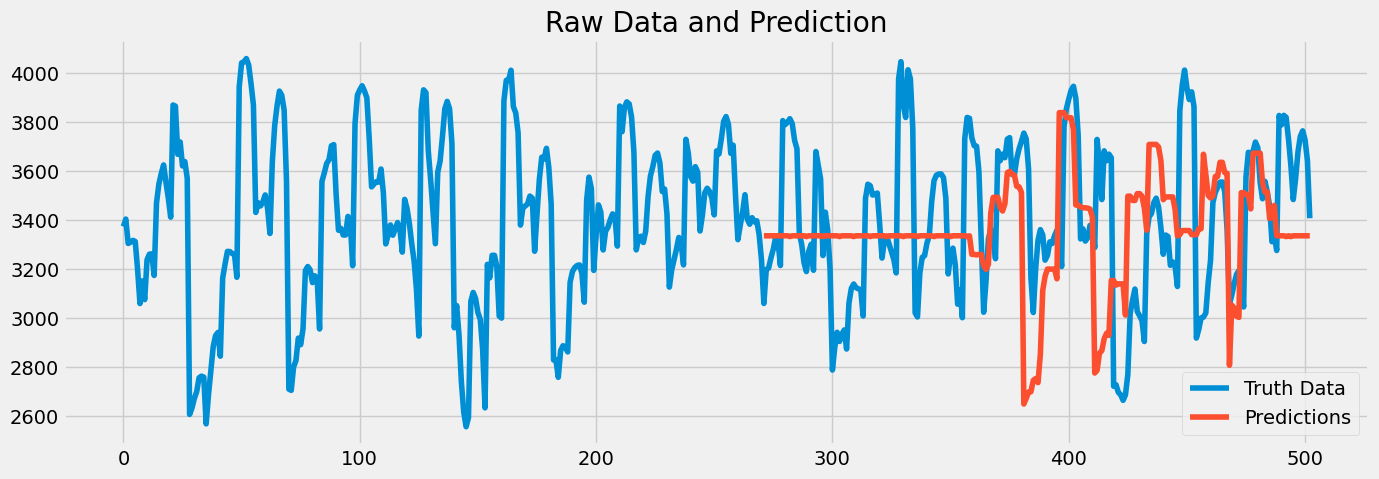

In [33]:
ax = df1[['Total']].plot(figsize=(15,5))
df1['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [34]:
score = np.sqrt(mean_squared_error(test['Total'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 352.19
